[*********************100%***********************]  1 of 1 completed


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\jeffe_qx0ubfz\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\jeffe_qx0ubfz\AppData\Local\Temp\ipykernel_28328\1294949166.py", line 85, in plot_graph
    grafico2 = sns.regplot(x=teste[keyword].values, y=med, color='black')
  File "c:\Users\jeffe_qx0ubfz\anaconda3\lib\site-packages\seaborn\regression.py", line 747, in regplot
    plotter = _RegressionPlotter(x, y, data, x_estimator, x_bins, x_ci,
  File "c:\Users\jeffe_qx0ubfz\anaconda3\lib\site-packages\seaborn\regression.py", line 112, in __init__
    self.dropna("x", "y", "units", "x_partial", "y_partial")
  File "c:\Users\jeffe_qx0ubfz\anaconda3\lib\site-packages\seaborn\regression.py", line 60, in dropna
    not_na = np.all(np.column_stack([pd.notnull(v) for v in vals]), axis=1)
  File "<__array_function__ internals>", line 180, in column_stack
  File "c:\Users\jeffe_qx0ubfz\anaconda3\lib\site-p

<Figure size 640x480 with 0 Axes>

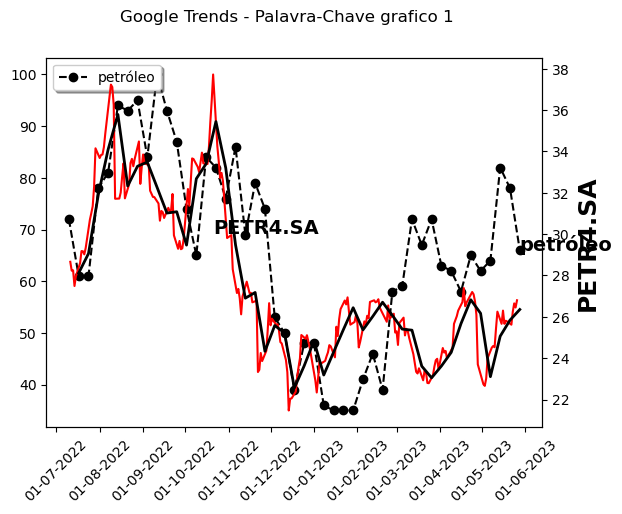

In [2]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import matplotlib.dates as mdates
import pandas_datareader.data as web
import datetime as dt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import yfinance as yf
import numpy as np

# Função para plotar o gráfico
def plot_graph():
    # Conexão com o servidor
    pytrends = TrendReq(hl='en-US', tz=360)

    # Palavra-chave e ação
    keyword = entry_keyword.get()
    ticker = entry_ticker.get()+".SA"

    # Frequência das palavras-chaves
    grafico1 = plt.figure()
    ax1 = grafico1.add_subplot(111)
    grafico1.suptitle("Google Trends - Palavra-Chave grafico 1")

    # Entrada das datas pelo usuário
    data_inicio = entry_data_inicio.get()
    data_fim = entry_data_fim.get()

    # Processamento das datas
    inicio = dt.datetime.strptime(data_inicio, "%Y-%m-%d")
    fim = dt.datetime.strptime(data_fim, "%Y-%m-%d")

    # Download do Google Trends
    pytrends.build_payload([keyword], cat=0,
                           timeframe=f'{data_inicio} {data_fim}',
                           geo='BR', gprop='')

    teste = pytrends.interest_over_time()

    # Formação do gráfico
    ax1.plot(teste[keyword], '--ok')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.setp(ax1.get_xticklabels(), rotation=45)
    ax1.legend((keyword,), loc='upper left', shadow=True)
    ax1.text(x=teste.index[-1], y=teste[keyword][-1], s=keyword,
             fontsize=14, color='black', weight='bold')

    # Criação da nova janela para o gráfico 1
    window_grafico1 = tk.Toplevel(window)
    window_grafico1.title("Gráfico 1")

    # Criação do widget FigureCanvasTkAgg
    canvas1 = FigureCanvasTkAgg(grafico1, master=window_grafico1)
    canvas1.draw()

    # Exibição do gráfico na janela
    canvas1.get_tk_widget().pack()

    # DataReader
    df = yf.download(ticker, start=inicio, end=fim)

    ax2 = ax1.twinx()
    ax2.plot(df.index, df['Close'], color='red')
    ax2.set_ylabel(ticker, fontsize=18, weight='bold')

    # Encontrar o índice do valor máximo na coluna 'Close'
    index_max = np.argmax(df['Close'])

    # Plotar o texto utilizando o índice encontrado
    ax2.text(x=df.index[index_max], y=30, s=ticker, fontsize=14, weight='bold')

    # Amostragem dos pontos da ação
    med = df['Close'].resample('w').mean()

    # Ajustar o tamanho da série 'med' para ter o mesmo tamanho de 'teste'
    med = med[:len(teste)]

    ax2.plot(med.index, med, '-k', linewidth=2)

    # Regressão linear
    figura2 = plt.figure()
    grafico2 = sns.regplot(x=teste[keyword].values, y=med, color='black')
    grafico2.set_xlabel(f'Palavra "{keyword}" grafico 2', fontsize=16)
    grafico2.set_ylabel(f'Preço {ticker}(R$)', fontsize=16)

    # Plotagem conjunta
    grafico3 = sns.jointplot(
        x=teste[keyword].values, y=med, kind='scatter', color='black')
    grafico3.set_axis_labels(
        f'Palavra "{keyword}"', f'Preço {ticker}(R$) grafico 3', fontsize=16)

    # Cálculo do coeficiente de correlação de Pearson
    pearson_coef, _ = stats.pearsonr(teste[keyword].values, med)
    # Exibir o coeficiente de correlação
    print("Coeficiente de correlação de Pearson:", pearson_coef)

    # Criação de uma nova janela para o segundo gráfico
    window2 = tk.Toplevel(window)
    window2.title("Gráfico 2")
    canvas2 = FigureCanvasTkAgg(figura2, master=window2)
    canvas2.draw()
    canvas2.get_tk_widget().pack()

    # Criação de uma nova janela para o terceiro gráfico
    window3 = tk.Toplevel(window)
    window3.title("Gráfico 3")
    canvas3 = FigureCanvasTkAgg(grafico3.fig, master=window3)
    canvas3.draw()
    canvas3.get_tk_widget().pack()


# Criação da janela principal
window = tk.Tk()
window.title("KTinder")
window.geometry("400x300")

# Labels
label_keyword = tk.Label(window, text="Palavra-chave:")
label_keyword.pack()

label_ticker = tk.Label(window, text="Ação:")
label_ticker.pack()

label_data_inicio = tk.Label(window, text="Data de início (YYYY-MM-DD):")
label_data_inicio.pack()

label_data_fim = tk.Label(window, text="Data de fim (YYYY-MM-DD):")
label_data_fim.pack()

# Entries
entry_keyword = tk.Entry(window)
entry_keyword.pack()

entry_ticker = tk.Entry(window)
entry_ticker.pack()

entry_data_inicio = tk.Entry(window)
entry_data_inicio.pack()

entry_data_fim = tk.Entry(window)
entry_data_fim.pack()

# Button
button_plot = tk.Button(window, text="Plotar Gráfico", command=plot_graph)
button_plot.pack()

button_exit = tk.Button(window, text="Sair", command=window.quit)
button_exit.pack()

# Run the GUI
window.mainloop()